# 머신러닝

In [ ]:
import numpy as np
import pandas as pd

In [2]:
#평가
from sklearn import metrics
#학습용과 평가용 나누는 
from sklearn.model_selection import train_test_split
#mnist라는 데이터 셋 불러오기
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml("mnist_784", version = 1, as_frame=False)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [5]:
# 우리가 직접 데이터를 나눠야 함
#입력 : 문제지, 정답지 -> 출력 : 모의문제, 실전문제, 모의 정답, 실전 정답

(train_data, test_data, train_label, test_label) = train_test_split (
        np.array(mnist.data),
        mnist.target,
        test_size = 0.25,
        random_state = 1234)

In [6]:
len(train_data)  #모의고사 문제 52000개

52500

In [7]:
len(test_data)  #실전 문제 : 17500개

17500

In [8]:
#사전 작업1) 정답지에 대한 체크 -> 종류가 몇 개인지(분류), 숫자들에 대한 분포(회귀)
                              # : 정답지가 0~9까지 있어야 하니
np.unique(train_label)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [10]:
digit, counts = np.unique(train_label, return_counts = True)
print(np.asarray((digit, counts)).T)

[['0' 5247]
 ['1' 5866]
 ['2' 5235]
 ['3' 5351]
 ['4' 5081]
 ['5' 4743]
 ['6' 5199]
 ['7' 5476]
 ['8' 5148]
 ['9' 5154]]


In [12]:
train_data.shape

(52500, 784)

In [13]:
train_data[0]  #784개

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  4

In [14]:
# 이미지 데이터를 시각화를 통해 EDA
import seaborn as sns

In [17]:
np.sqrt(train_data[0].shape)

array([28.])

<AxesSubplot:>

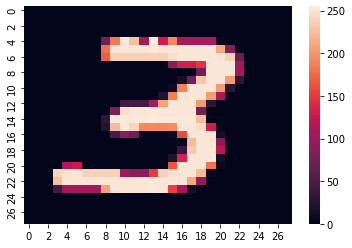

In [24]:
# 내가 탐색할 이미지 번호
idx = 1234
image_data = train_data[idx]
# 1차원의 imgae_data -> 2차원으로 변환
tot_size = image_data.shape[0]  #784 = 28 * 28
one_size = int(np.sqrt(tot_size))  # 28
#시각화 - heatmap
sns.heatmap(np.reshape(image_data, (one_size, one_size)))  #모양 변환 : reshape -> 무엇을 어떻게

In [ ]:
### 각 특징 컬럼의 값의 변화를 정규화 작업
# 대표적 : minMaxScaler(min = 0, max = 1), StandScaler(평균, 표준편차)
# 각 컬럼들의 영향력을 동일한 레벨에서 파악하기 위해서

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
# A : 10, 20, 30 -> 10 / 20  : fit -> 0, 0.5, 1 : transform
# A : 10, 20, 30 -> 10 / 20  : fit -> 0, 0.5, 1 : transform
# B : 100, 200, 300  -> -100/200  
#우리가 minMaxscaler를 사용해도 구체적인 컬럼의 값에 따라서 변환 룰은 다름 

In [29]:
# 적용할 모델 불러오기
min_max_sc = MinMaxScaler()
# 주어진 데이터를 기반으로 룰을 잡고, 그 룰대로 반환 : fit_transrom
train_norm = min_max_sc.fit_transform(train_data)
#test_norm = min_max.sc.fit_transform(test_data)
test_norm = min_max_sc.transform(test_data)

> *주의사항*                                                                                                          
> test는 정말로 모른다 생각하고 학습에서 고려하면 안 됨                                                                     
> train만으로 규칙을 만들어서 train, test 모두 적용                                                                           
> 단, test에서 unseen발생 할 때 처리

In [30]:
train_norm[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
## 보통은 모델을 돌리기 위해서 기본 : 누락 데이터 & 인코딩(숫자로 바꿈)
# -> 모든 값들이 다 "숫자로 변환"

In [32]:
# 실제 모델을 가지고 와서 수행 
# -> 분류 : ~~Classifier  / 회귀 : ~~~Regressor  목적에 맞는 정확한 모델 불러와야함!
from sklearn.neighbors import KNeighborsClassifier

# 평가
from sklearn import metrics
from sklearn.metrics import accuracy_score # 전체 중에 몇 개 맞춰서 

#시간
import time

In [33]:
t1 = time.time()
# 내가 사용할 모델 불러오기 -> 필요한 파라미터 세팅과 모델 
knn = KNeighborsClassifier(n_neighbors = 9, n_jobs = -1)

#학습 : 문제지와 정답지 -> 파라미티 최적합(오차 줄이는..)
knn.fit(train_data, train_label)

#만들어진 모델로 예측 -> 실전 문제 풀어야함
pred = knn.predict(test_data) # 수능 OMR 정답지

#얼마나 잘 했나 채점 : accuracy 
print(accuracy_score(test_label, pred))

t2 = time.time()
print("수행 시간:" , str(t2-t1))

0.9688571428571429
수행 시간: 32.433642625808716


In [34]:
# 1번 train 전체로 학습하고 test를 바로 하려니 overfit 리스트
# k-fold crossval
# 자체적으로 전체범위를 모의고사, 실전 훈련
from sklearn.model_selection import cross_val_score

In [39]:
# k = 3, 5, 7, 9, .., 19, ... : 최적의 파라미터의 조합 (보통 홀수를 사용)

# 테스트 할 파라미터의 값들 세팅
neighbors = [i for i in range(40) if i %2 == 1]
# 위에서 테스트할 k값에 대해서 성능을 정리하려고 함
cv_scores = []

# 앞에서 설정한 k값에 따라서 돌려보자 
for k in neighbors:
    knn = KNeighborsClassifier( n_neighbors = k, n_jobs = -1)
    scores = cross_val_score(knn, train_data, train_label, cv = 10, scoring = "accuracy" ) #모델, 데이터 - 문제, 정답, 몇 등분, 평가 방법
    cv_scores.append(scores.mean())
    print(str(k)+ ":" + str(scores.mean()))
    

1:0.970057142857143
3:0.9701142857142857
5:0.9690666666666667
7:0.9681333333333335
9:0.9668571428571429
11:0.965447619047619
13:0.9641523809523811
15:0.9631619047619047
17:0.9620571428571427
19:0.9606285714285715
21:0.9593142857142858
23:0.9587238095238095
25:0.9576
27:0.9565714285714286
29:0.9559428571428572
31:0.9549714285714286
33:0.9540761904761904
35:0.9533714285714285
37:0.9525333333333332
39:0.9517714285714286


In [40]:
# 그 중에 가장 대표적인 피처를 줄이는 PCA
from sklearn.decomposition import PCA

In [45]:
# 784 -> 별로 영향 안 미치는 컬럼도 있고, 중요하지 않은 것
# 변동폭이 큰 주된 25개의 축으로 변환해서 분석해보자
num_comp = 25
pca = PCA(n_components = num_comp)
pca.fit(train_data)

PCA(n_components=25)

In [46]:
np.sum(pca.explained_variance_ratio_)

0.6932065906637873

In [47]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

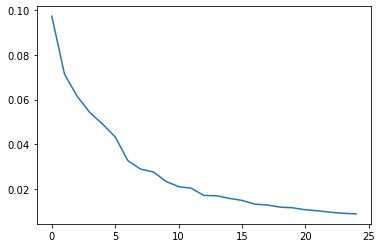

In [48]:
plt.plot(pca.explained_variance_ratio_)
plt.show

In [49]:
# 내가 25개로 줄이기로 선택을 했다면 -> 그 기준에 맞춰서 변형을 해야함
num_comp = 25
pca = PCA(n_components = num_comp)
train_pca = pca.fit_transform(train_data)
test_pca = pca.transform(test_data)

In [50]:
train_pca.shape

(52500, 25)

In [51]:
test_pca.shape

(17500, 25)

In [52]:
t1 = time.time()
# 내가 사용할 모델 불러오기 -> 필요한 파라미터 세팅과 모델 
knn = KNeighborsClassifier(n_neighbors = 9, n_jobs = -1)

#학습 : 문제지와 정답지 -> 파라미티 최적합(오차 줄이는..)
knn.fit(train_pca, train_label)

#만들어진 모델로 예측 -> 실전 문제 풀어야함
pred = knn.predict(test_pca) # 수능 OMR 정답지

#얼마나 잘 했나 채점 : accuracy 
print(accuracy_score(test_label, pred))

t2 = time.time()
print("수행 시간:" , str(t2-t1))

0.9731428571428572
수행 시간: 22.125466108322144


In [53]:
# k = 3, 5, 7, 9, .., 19, ... : 최적의 파라미터의 조합 (보통 홀수를 사용)

# 테스트 할 파라미터의 값들 세팅
neighbors = [i for i in range(25) if i %2 == 1]
# 위에서 테스트할 k값에 대해서 성능을 정리하려고 함
cv_scores = []

# 앞에서 설정한 k값에 따라서 돌려보자 
for k in neighbors:
    knn = KNeighborsClassifier( n_neighbors = k, n_jobs = -1)
    scores = cross_val_score(knn, train_pca, train_label, cv = 5, scoring = "accuracy" ) #모델, 데이터 - 문제, 정답, 몇 등분, 평가 방법
    cv_scores.append(scores.mean())
    print(str(k)+ ":" + str(scores.mean()))

1:0.9711428571428572
3:0.9726285714285714
5:0.9719047619047618
7:0.9709333333333333
9:0.9697904761904761
11:0.9686095238095238
13:0.968152380952381
15:0.9671047619047618
17:0.9663809523809525
19:0.9656190476190476
21:0.9646095238095238
23:0.9641904761904762
